In [ ]:
import pandas as pd
import matplotlib.pyplot as plt

from sklearn.preprocessing import StandardScaler
from sklearn.cluster import KMeans

In [ ]:
from google.colab import files
uploaded=files.upload()

Saving train.csv to train.csv


In [ ]:
df = pd.read_csv('train.csv')

In [ ]:
print(df)

        Age      Gender   Platform  Daily_Usage_Time (minutes)  Posts_Per_Day  \
User_ID                                                                         
1        25      Female  Instagram                       120.0            3.0   
2        30        Male    Twitter                        90.0            5.0   
3        22  Non-binary   Facebook                        60.0            2.0   
4        28      Female  Instagram                       200.0            8.0   
5        33        Male   LinkedIn                        45.0            1.0   
...      ..         ...        ...                         ...            ...   
996      33  Non-binary    Twitter                        85.0            4.0   
997      22      Female   Facebook                        70.0            1.0   
998      35        Male   Whatsapp                       110.0            3.0   
999      28  Non-binary   Telegram                        60.0            2.0   
1000     27      Female   Sn

In [ ]:
df.dropna(inplace = True)
df.describe()
scaler = StandardScaler()

In [ ]:
df[['User_ID_T','Daily_Usage_Time (minutes)_T','Posts_Per_Day_T','Likes_Received_Per_Day_T','Comments_Received_Per_Day_T',' Messages_Sent_Per_Day_T']] = scaler.fit_transform(df[['User_ID','Daily_Usage_Time (minutes)','Posts_Per_Day','Likes_Received_Per_Day','Comments_Received_Per_Day','Messages_Sent_Per_Day']])
print(df)

     User_ID Age      Gender   Platform  Daily_Usage_Time (minutes)  \
0          1  25      Female  Instagram                       120.0   
1          2  30        Male    Twitter                        90.0   
2          3  22  Non-binary   Facebook                        60.0   
3          4  28      Female  Instagram                       200.0   
4          5  33        Male   LinkedIn                        45.0   
...      ...  ..         ...        ...                         ...   
996      996  33  Non-binary    Twitter                        85.0   
997      997  22      Female   Facebook                        70.0   
998      998  35        Male   Whatsapp                       110.0   
999      999  28  Non-binary   Telegram                        60.0   
1000    1000  27      Female   Snapchat                       120.0   

      Posts_Per_Day  Likes_Received_Per_Day  Comments_Received_Per_Day  \
0               3.0                    45.0                       10.0   

In [ ]:
def optimise_k_means(data, max_k):
    means = []
    inertias = []

    for k in range(1, max_k):
      kmeans = KMeans(n_clusters = k)
      kmeans.fit(data)

      means.append(k)
      inertias.append(kmeans.inertia_)


      fig = plt.subplots(figsize=(10,5))
      plt.plot(means, inertias, 'o-')
      plt.xlabel('Numer of clusters')
      plt.ylabel('Inertia')
      plt.grid(True)
      plt.show


/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:8

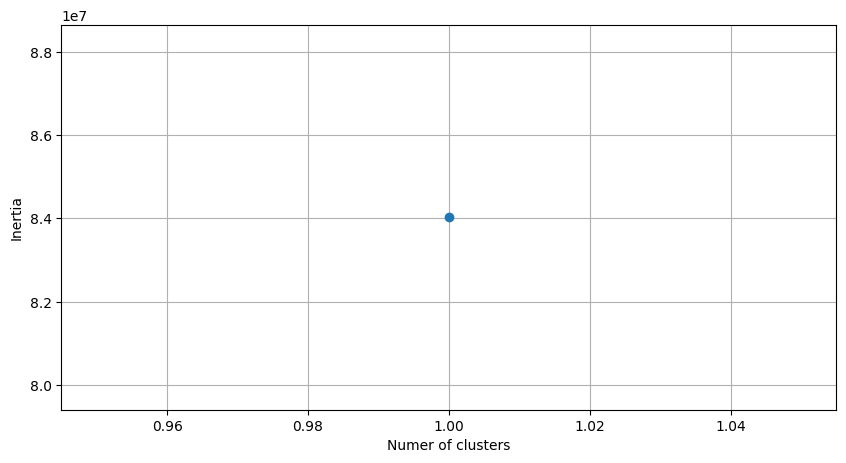

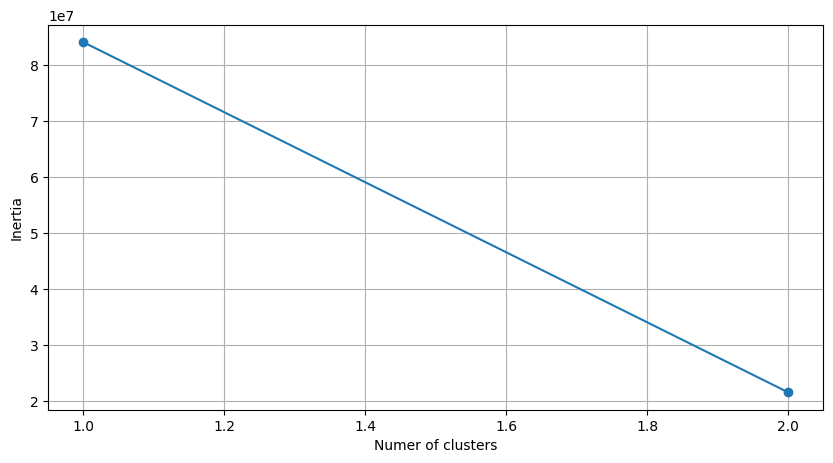

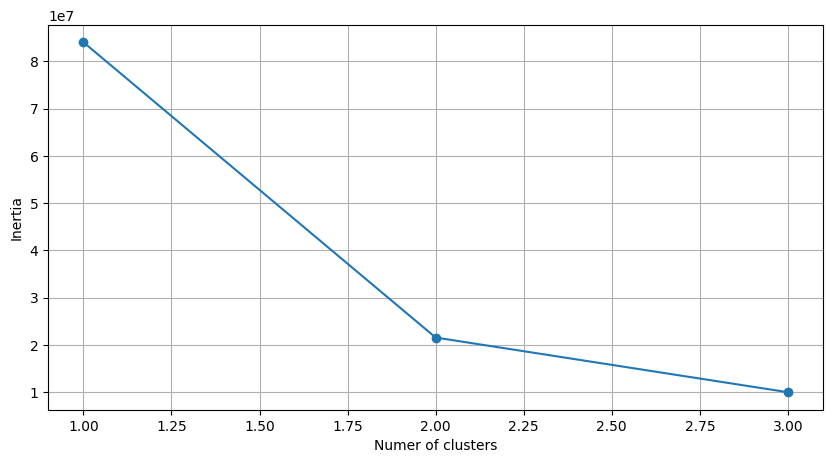

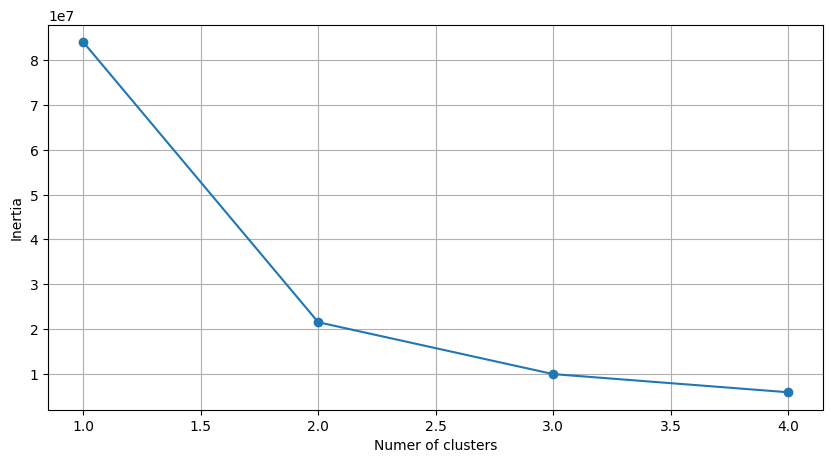

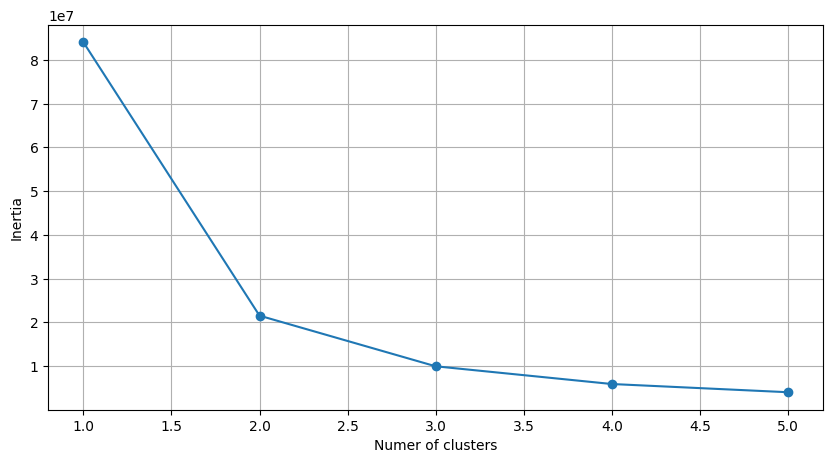

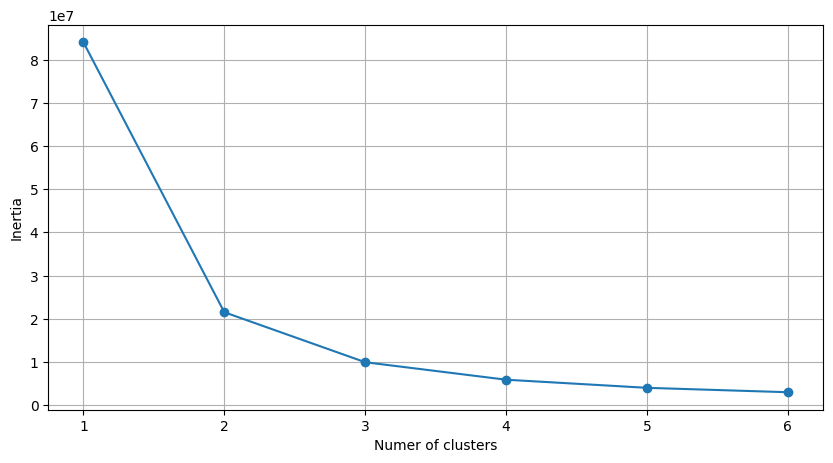

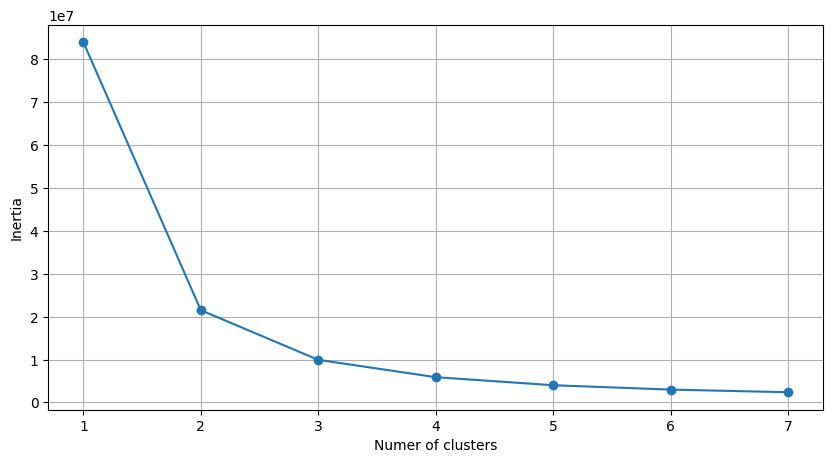

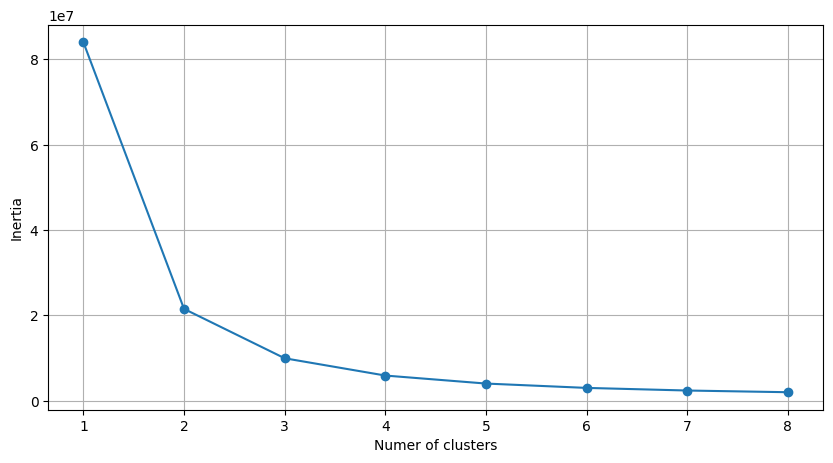

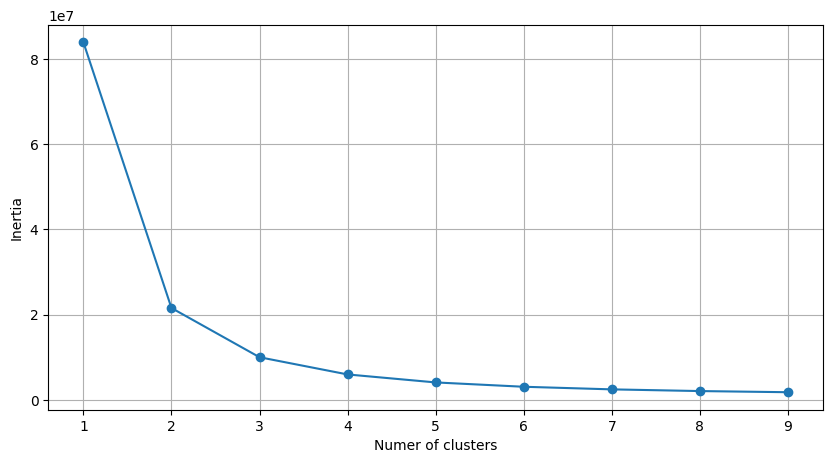

In [ ]:
optimise_k_means(df[['User_ID','Likes_Received_Per_Day']],10)

In [ ]:
kmeans = KMeans(n_clusters=5)
kmeans.fit(df[['User_ID_T','Likes_Received_Per_Day_T']])

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


KMeans(n_clusters=5)

In [ ]:
df['kmeans_5']=kmeans.labels_
print(df)

     User_ID Age      Gender   Platform  Daily_Usage_Time (minutes)  \
0          1  25      Female  Instagram                       120.0   
1          2  30        Male    Twitter                        90.0   
2          3  22  Non-binary   Facebook                        60.0   
3          4  28      Female  Instagram                       200.0   
4          5  33        Male   LinkedIn                        45.0   
...      ...  ..         ...        ...                         ...   
996      996  33  Non-binary    Twitter                        85.0   
997      997  22      Female   Facebook                        70.0   
998      998  35        Male   Whatsapp                       110.0   
999      999  28  Non-binary   Telegram                        60.0   
1000    1000  27      Female   Snapchat                       120.0   

      Posts_Per_Day  Likes_Received_Per_Day  Comments_Received_Per_Day  \
0               3.0                    45.0                       10.0   

<function matplotlib.pyplot.show(close=None, block=None)>

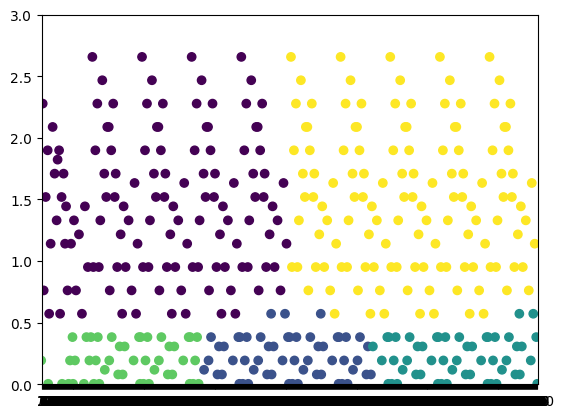

In [ ]:
plt.scatter(x=df['User_ID'],y=df['Likes_Received_Per_Day_T'],c=df['kmeans_5'])
plt.xlim(1, 1000)
plt.ylim(-0.0, 3)
plt.show

<function matplotlib.pyplot.show(close=None, block=None)>

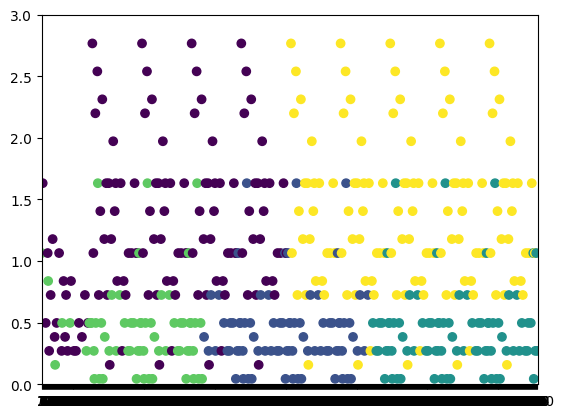

In [ ]:
plt.scatter(x=df['User_ID'],y=df['Comments_Received_Per_Day_T'],c=df['kmeans_5'])
plt.xlim(1, 1000)
plt.ylim(-0.0, 3)
plt.show

<function matplotlib.pyplot.show(close=None, block=None)>

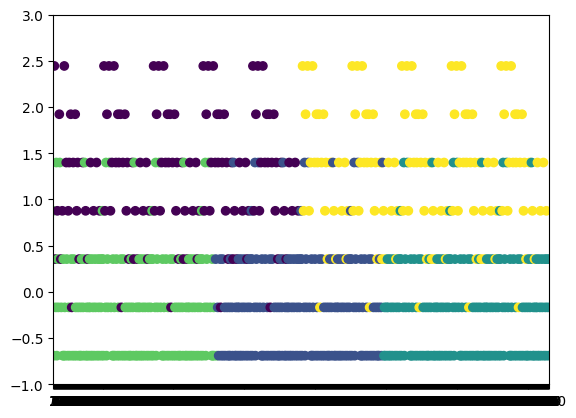

In [ ]:
plt.scatter(x=df['User_ID'],y=df['Posts_Per_Day_T'],c=df['kmeans_5'])
plt.xlim(1, 1000)
plt.ylim(-1,3)
plt.show

<function matplotlib.pyplot.show(close=None, block=None)>

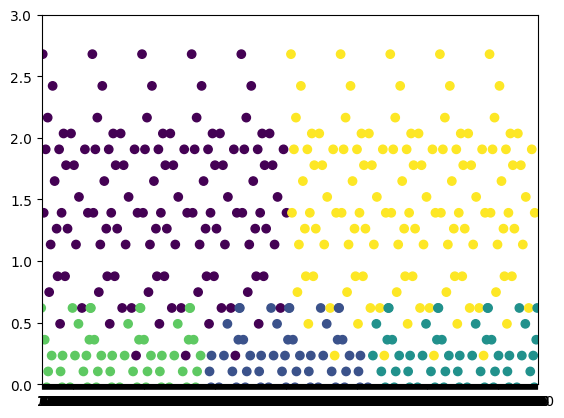

In [ ]:
plt.scatter(x=df['User_ID'],y=df['Daily_Usage_Time (minutes)_T'],c=df['kmeans_5'])
plt.xlim(1, 1000)
plt.ylim(-0.0, 3)
plt.show

<function matplotlib.pyplot.show(close=None, block=None)>

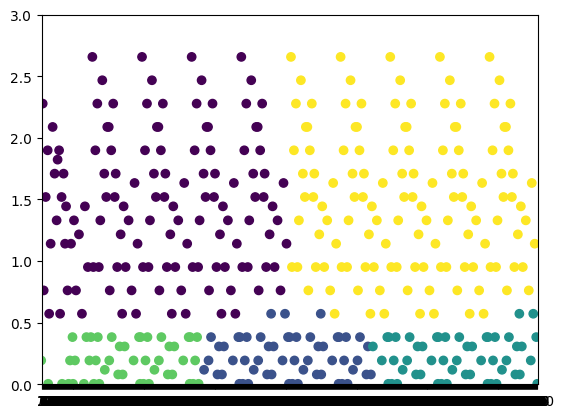

In [ ]:
plt.scatter(x=df['User_ID'],y=df['Likes_Received_Per_Day_T'],c=df['kmeans_5'])
plt.xlim(1, 1000)
plt.ylim(-0.0, 3)
plt.show

In [ ]:
for k in range(1,6):
  kmeans=KMeans(n_clusters=k)
  kmeans.fit(df[['User_ID','Likes_Received_Per_Day_T']])
  df[f'KMeans_{k}']=kmeans.labels_

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:8

In [ ]:
print(df)

     User_ID Age      Gender   Platform  Daily_Usage_Time (minutes)  \
0          1  25      Female  Instagram                       120.0   
1          2  30        Male    Twitter                        90.0   
2          3  22  Non-binary   Facebook                        60.0   
3          4  28      Female  Instagram                       200.0   
4          5  33        Male   LinkedIn                        45.0   
...      ...  ..         ...        ...                         ...   
996      996  33  Non-binary    Twitter                        85.0   
997      997  22      Female   Facebook                        70.0   
998      998  35        Male   Whatsapp                       110.0   
999      999  28  Non-binary   Telegram                        60.0   
1000    1000  27      Female   Snapchat                       120.0   

      Posts_Per_Day  Likes_Received_Per_Day  Comments_Received_Per_Day  \
0               3.0                    45.0                       10.0   

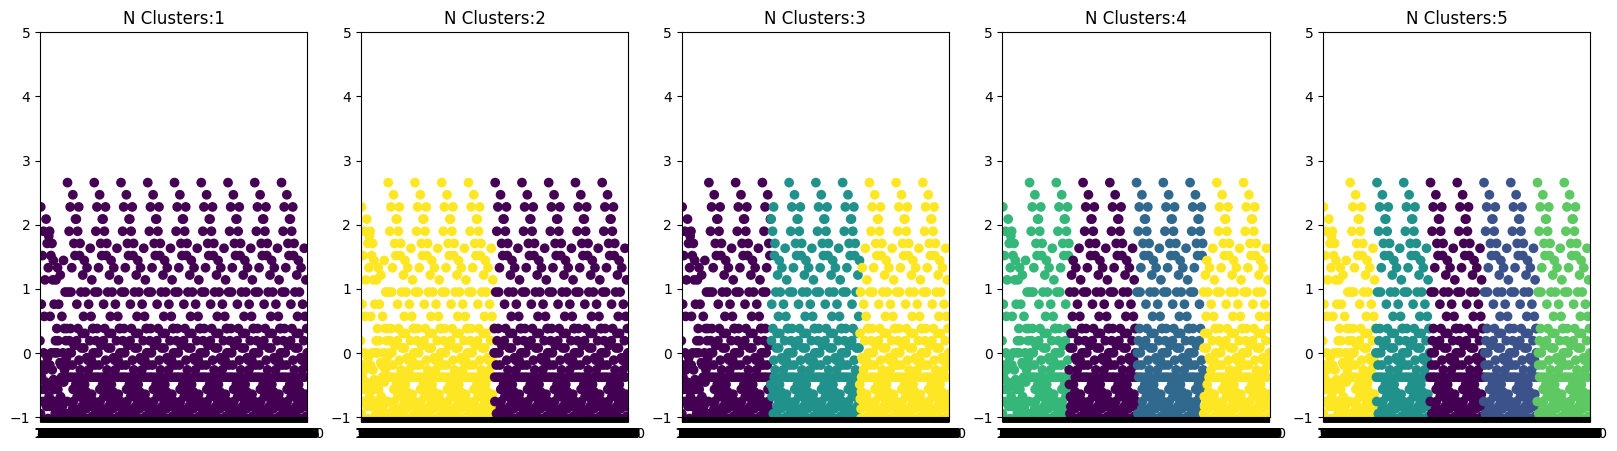

In [ ]:
fig, axs=plt.subplots(nrows=1,ncols=5,figsize=(20,5))
for i,ax in enumerate(fig.axes, start=1):
  ax.scatter(x=df['User_ID'],y=df['Likes_Received_Per_Day_T'],c=df[f'KMeans_{i}'])
  ax.set_xlim(1, 1000)
  ax.set_ylim(-1, 5)
  ax.set_title(f'N Clusters:{i}')

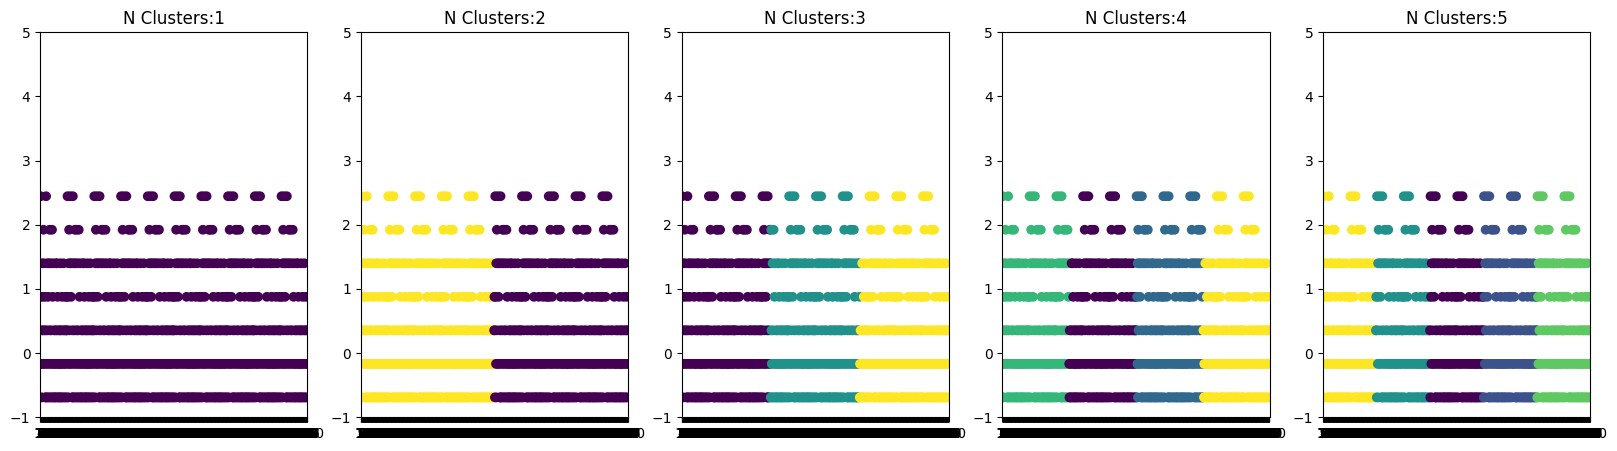

In [ ]:
fig, axs=plt.subplots(nrows=1,ncols=5,figsize=(20,5))
for i,ax in enumerate(fig.axes, start=1):
  ax.scatter(x=df['User_ID'],y=df['Posts_Per_Day_T'],c=df[f'KMeans_{i}'])
  ax.set_xlim(1, 1000)
  ax.set_ylim(-1, 5)
  ax.set_title(f'N Clusters:{i}')

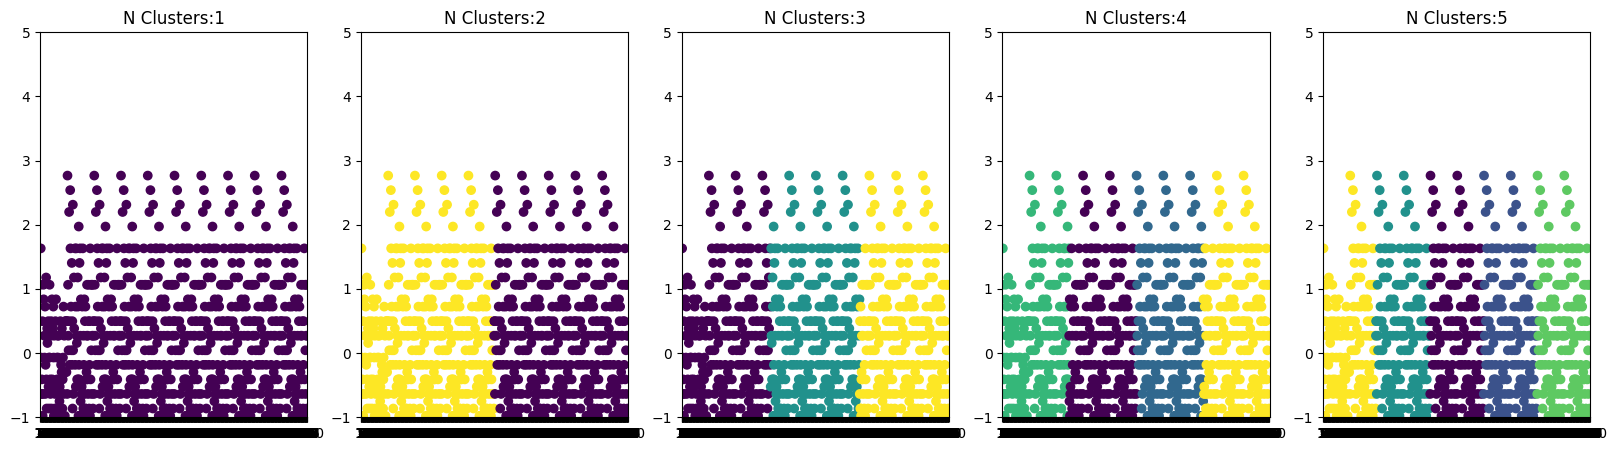

In [ ]:
fig, axs=plt.subplots(nrows=1,ncols=5,figsize=(20,5))
for i,ax in enumerate(fig.axes, start=1):
  ax.scatter(x=df['User_ID'],y=df['Comments_Received_Per_Day_T'],c=df[f'KMeans_{i}'])
  ax.set_xlim(1, 1000)
  ax.set_ylim(-1, 5)
  ax.set_title(f'N Clusters:{i}')

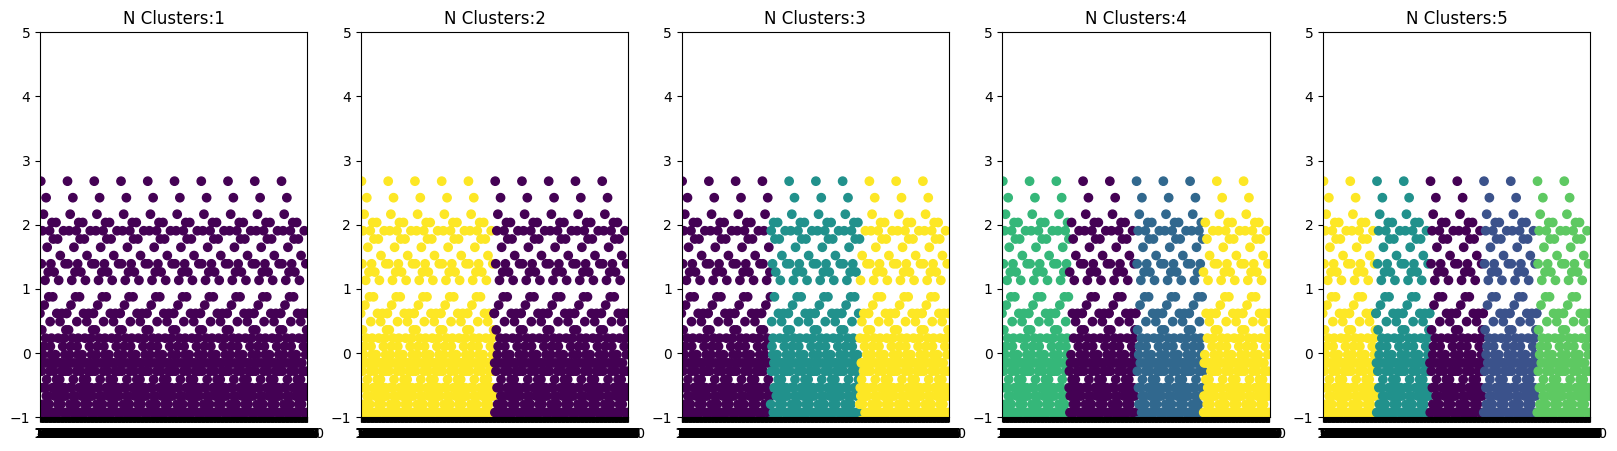

In [ ]:
fig, axs=plt.subplots(nrows=1,ncols=5,figsize=(20,5))
for i,ax in enumerate(fig.axes, start=1):
  ax.scatter(x=df['User_ID'],y=df['Daily_Usage_Time (minutes)_T'],c=df[f'KMeans_{i}'])
  ax.set_xlim(1, 1000)
  ax.set_ylim(-1, 5)
  ax.set_title(f'N Clusters:{i}')